<a href="https://colab.research.google.com/github/nicklausmillican/StatisticalRethinkingIISolutions/blob/main/StatisticalRethinkingSolutions2_Ch9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Checking versions of g++ and make
system("g++ --version", intern = TRUE)
system("make --version", intern = TRUE)

# Install g++ and make if needed
system("sudo apt install g++", intern = TRUE)
system("sudo apt install make", intern = TRUE)


[1] "g++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0"                                  
[2] "Copyright (C) 2021 Free Software Foundation, Inc."                          
[3] "This is free software; see the source for copying conditions.  There is NO" 
[4] "warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE."
[5] ""

[1] "GNU Make 4.3"                                                                 
[2] "Built for x86_64-pc-linux-gnu"                                                
[3] "Copyright (C) 1988-2020 Free Software Foundation, Inc."                       
[4] "License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>"
[5] "This is free software: you are free to change and redistribute it."           
[6] "There is NO WARRANTY, to the extent permitted by law."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "g++ is already the newest version (4:11.2.0-1ubuntu1)."         
[5] "g++ set to manually installed."                                 
[6] "0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "make is already the newest version (4.3-4.1build1)."            
[5] "make set to manually installed."                                
[6] "0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded."

In [3]:
# Install cmdstanr from GitHub
if (!require(cmdstanr)) {
  devtools::install_github("stan-dev/cmdstanr")
}

# Set up CmdStan if it's not already set up
library(cmdstanr)
if (!cmdstanr::cmdstan_version()) {
  cmdstanr::install_cmdstan()
}

# Verify installation
cmdstanr::check_cmdstan_toolchain()


ERROR: Error: CmdStan path has not been set yet. See ?set_cmdstan_path.


In [4]:
# Install CmdStan using cmdstanr
library(cmdstanr)
cmdstanr::install_cmdstan()

# After installation, set the CmdStan path
cmdstan_path <- cmdstanr::cmdstan_path()
cmdstanr::set_cmdstan_path(cmdstan_path)

# Verify the installation
cmdstanr::cmdstan_version()


The C++ toolchain required for CmdStan is setup properly!

* Latest CmdStan release is v2.34.1

* Installing CmdStan v2.34.1 in /root/.cmdstan/cmdstan-2.34.1

* Downloading cmdstan-2.34.1.tar.gz from GitHub...

* Download complete

* Unpacking archive...

* Building CmdStan binaries...



cp bin/linux-stanc bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.c -o stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.o
chmod +x bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/sundials/sundials_math.c -o stan/lib/stan_math/lib/sundials_6.1.1/src/sundials/sundials_math.o
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1

* Finished installing CmdStan to /root/.cmdstan/cmdstan-2.34.1


CmdStan path set to: /root/.cmdstan/cmdstan-2.34.1

CmdStan path set to: /root/.cmdstan/cmdstan-2.34.1



[1] "2.34.1"

In [5]:
# Install necessary packages
install.packages(c("coda", "mvtnorm", "devtools", "loo", "dagitty", "shape"))

# Load devtools for GitHub installation
library(devtools)

# Install rethinking from GitHub
devtools::install_github("rmcelreath/rethinking")


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘Rcpp’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’, ‘V8’


Loading required package: usethis





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp4BRx2V/remotesbf207a5b86/rmcelreath-rethinking-f3ac8de/DESCRIPTION’ ... OK
* preparing ‘rethinking’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘rethinking_2.40.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
library(rethinking)

Loading required package: posterior

This is posterior version 1.5.0


Attaching package: ‘posterior’


The following objects are masked from ‘package:stats’:

    mad, sd, var


The following objects are masked from ‘package:base’:

    %in%, match


Loading required package: parallel

rethinking (Version 2.40)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




In [7]:
# Test Installation

## Simulate some data for a binary outcome based on a single predictor
n <- 100
x <- rnorm(n)
prob <- 1 / (1 + exp(-x))
y <- rbinom(n, 1, prob)

## Fit a logistic regression using ulam
fit <- ulam(
  alist(
    y ~ bernoulli( p ),
    logit(p) <- a + b*x,
    a ~ normal(0, 1),
    b ~ normal(0, 1)
  ), data = list(x = x, y = y)
)

precis(fit)

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.0 seconds.


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0.2165228,0.2237186,-0.1560674,0.5628696,1.001793,274.1968
b,1.3291642,0.2992551,0.8560407,1.8222331,1.000893,310.4944


# Chapter 9

This chapter delves into some of the algorithms used for Bayesian inference.  **Statistical Rethinking** gives enough information for a working understanding of these algorithms.  A more-thorough, but-still-approachable treatment of these algorithms is given in Ben Lambert's great book [**A Student's Guide to Bayesian Statistics**](https://www.amazon.com/Students-Guide-Bayesian-Statistics/dp/1473916364).

## Easy

### 9E1
Which of the following is a requirement of the simple Metropolis algorithm?
1.   The parameters must be discrete.
2.   The likelihood function must be Gaussian.
3.   The proposal distribution must be symmetric.

#### Answer
I think it may be good to start with an overview of the simple Metropolis algorithm.

Start by imagining a space of values for parameters $\theta$.  We could define a space for as many parameters as we want, but let's now only imagine a single parameter.  This one-parameter space can be thought of as a sinlge line stretching from left (smaller values) to right (larger values); the probability that for any given value is given by the posterior probability density $p(\theta|data)$ where more-probable values are higher than less-probable values.

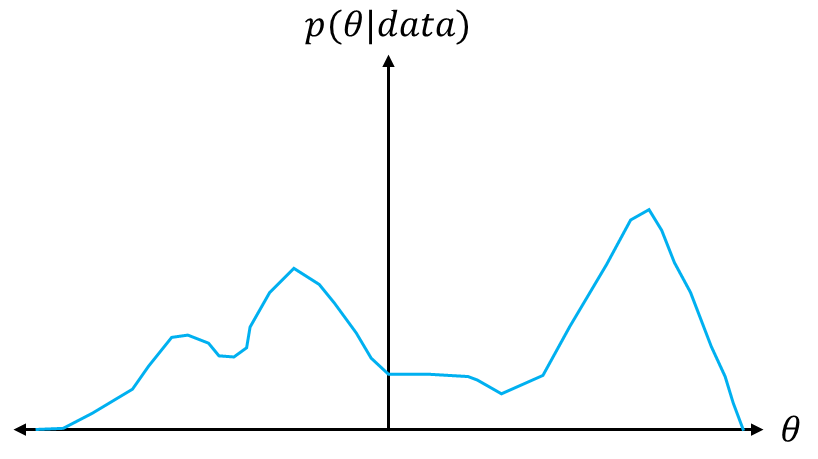

Of course, we don't know the posterior distribution (if we did, we wouldn't be trying to estimate it).  Instead, we can propose one value at a time for $\theta$ and then calculate $p(data|\theta)p(\theta)$.  This needs a name; since its the likelihood $p(data|theta)$ *weighted* by its prior $p(\theta)$, I'll refer to it as the "weighted likelihood".  Notice that the weighted likelihood is the numerator of Bayes' theorem $p(\theta|data) = \frac{p(data|\theta)p(\theta)}{p(data)}$, which means that the weighted likelihood is proportional to the posterior distribution $p(\theta|data) \propto p(data|\theta)p(\theta)$.

So we start by accepting a random value $cT_0$ ($c$ for "current", as in *the current value of $T$*) for $\theta$ and estimating its weighted likelihood, $wL_0$.  Next, we suggest another random value $sT_1$ ($s$ for "suggested", as in *a suggested value of $T$ that may replace $cT$*) for $\theta$ and calculate its weighted likelihood $wL_1$.  If $wL_1 > wL_0$, then we make a tally mark for $sT_1$.   But if $wL_1 < wL_0$, then we must choose between $cT_0$ vs $sT_1$.  In this situation, we choose according to the ratio $\frac{wL_1}{wL_0}$.  For example, if $\frac{wL_1}{wL_0} = \frac{1}{2}$, implying that $wL_1$ was half as large as $wL_0$, then we accept $wL_1$ half of the time and $wL_0$ the other half of the time.  Whichever we accept, we make a tally for that $T$.  Then we repeat this process.  Whichever $T$ was previously accepted becomes $cT$, so either $cT_0$ or $cT_1$, and it's compared against a new randomly suggested $sT_2$ in the same way.  When we repeat this process many times, we get a chain of accepted $T$ values--this chain is a "Markov chain".  We can plot the tally marks for the various $T$ values like a histogram; this histogram will approximate our posterior distribution.

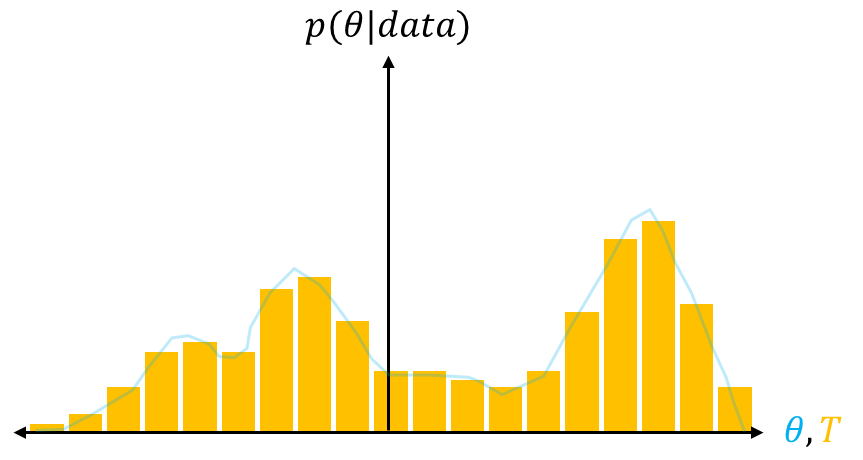

\

Now let's take the questions one at a time.

***1. The parameters must be discrete.***

Although the example given in the book uses discrete islands, discrete parameter values are **NOT required** of the Metropolis algorithm.  You simply need to be able to propose specific values for $\theta$, but these proposed values can come from either discrete or continuous spaces.

\

***2.The likelihood function must be Gaussian.***

This, again, is **NOT required**.  The expression we must continually examine, the weighted likelihood $p(data|\theta)p(\theta)$, is indifferent to distribution of the the likelihood.

\

***3. The proposal distribution must be symmetric.***

This one **IS required**.  The reason as to *why* is not expliciit in my explanation of the Metropolis alogrithm, so let's rectify that now.

Firstly, let's be clear about what we mean by a "symmetric proposal distribution".  Basically, we need to make sure that if we propose $T_b$ from $T_a$, we would be just as likely to propse $T_a$ from $T_b$.  Second, don't lose track of the difference between "proposing" and "accepting"; just because we need to be equally likely to *propose* $T_b$ from $T_a$ and $T_a$ from $T_b$, we will not be equally likely to *accept* $T_b$ from $T_a$ and $T_a$ from $T_b$; acceptance will depend on $\frac{wL_a}{wL_b}$ and $\frac{wL_b}{wL_a}$ as explained above.

With that out of the way, a rough explanation for the necessity of symmetric proposals is that, since the accepted values that constitute the Markov chain are already being filtered by the acceptance rule, additional filtering by an asymmetric proposal distribution could bias the Markov chain away from the actual posterior distribution.  A more technical explanation involves some background.

Imagine sampling $\theta$ values from our actual posterior distribution; more probable $\theta$ values would be sampled more frequently, and vice versa.  So after $n$ samples, we would have the set $\{\theta_1, ..., \theta_n \}$, and the probability of having drawn that sample would be the joint probability distribution $p(\theta_1, ..., \theta_n)$.  The idea behind using Markov chains to estimate the posterior distribution is to design the Markov chain such that it generates values $\{T_1, ..., T_n \}$ where $p(T_1, ..., T_n) \rightarrow p(\theta_1, ..., \theta_n)$ as $n$ gets large enough.  The accept-reject rule pushes the Markov chain towards the posterior.

Importantly, once $p(T_1, ..., T_n) \approx p(\theta_1, ..., \theta_n)$--that is, once the joint probabitliy distribution from our Markov chain is close to that of the samples from the posterior distribution--it should remain there rather than drifting away from the true posterior.  In order to remain stationary, the proposal distribution must be symmetric.  This statement really demands a demonstration.

Say we have two values from our Markov chain $T_a \sim p(\theta|data)$ and $T_b \sim (p\theta|data)$, where $p(T_b) > p(T_a)$.  If we are currently at $cT_a$, then we next propose $sT_b$ with probabilty $p(sT_b | cT_a)$.  Since $p(T_b) > p(T_a)$, we always accept this proposal.  So our Markov chain looks like $\{T_a, T_b \} \sim p(T_a, T_b) = p(T_a) \times p(sT_b | cT_a)$.

Now instead, start at $cT_b$ and propose $sT_a$ with probability $p(sT_a | cT_b)$.   Since $p(T_b) > p(T_a)$, we do NOT automatically accept this proposal; instead, we accept it as $\frac{wL_a}{wL_b}$.  So this version of our Markov looks like $\{T_b, T_a \} \sim p(T_b, T_a) = p(T_b) \times p(sT_a | cT_b) \times \frac{p(T_a)}{p(T_b)} = p(sT_a | cT_b) \times p(T_a)$.

Whether we start at $cT_a$ or $cT_b$, we need to settle on the same (actual posterior) distribution.  This means that $p(T_a, T_b) := p(T_b, T_a)$ and $p(T_a) \times p(sT_b | cT_a) := p(sT_a | cT_b) \times p(T_a)$, which means that $p(sT_b | cT_a) := p(sT_a | cT_b)$.  In other words, the proposal distribution for $cT_a \rightarrow sT_b$ must be equal/symmetric to $cT_b \rightarrow sT_a$

### 9E2
Gibbs sampling is more efficient than the Metropolis algorithm. How does it achieve this extra efficiency? Are there any limitations to the Gibbs sampling strategy?

#### Answer

### 9E3
Which sort of parameters can Hamiltonian Monte Carlo not handle? Can you explain why?

#### Answer

### 9E4
Explain the difference between the effective number of samples, n_eff as calculated by Stan, and the actual number of samples.

#### Answer

### 9E5
Explain the difference between the effective number of samples, `n_eff` as calculated by Stan, and the actual number of samples.

#### Answer

### 9E6
Sketch a good trace plot for a Markov chain, one that is effectively sampling from the posterior distribution. What is good about its shape? Then sketch a trace plot for a malfunctioning Markov chain. What about its shape indicates malfunction?

#### Answer

### 9E7
Repeat the problem above, but now for a trace rank plot.

#### Answer